In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from config import lunarcrush_api
import numpy as np

In [2]:
#URL Configuration
url = 'https://api.lunarcrush.com/v2?data=assets'

query_url = f'{url}&key={lunarcrush_api}&symbol='

In [3]:
#Create list of currency

coins = ['BTC', 'ETH', 'LTC', 'BCH', 'BNB', 'USDT', 'XRP'] 
percent_change_24h = []
percent_change_7d = []
percent_change_30d = []
social_score = []
correlation_rank = []
volatility = []
symbol = []
galaxy_score = []

for coin in coins:
    response = requests.get(query_url + coin).json()
    symbol.append(response['data'][0]['symbol'])
    percent_change_24h.append(response['data'][0]['percent_change_24h'])
    percent_change_7d.append(response['data'][0]['percent_change_7d'])
    percent_change_30d.append(response['data'][0]['percent_change_30d'])
    social_score.append(response['data'][0]['social_score'])
    correlation_rank.append(response['data'][0]['correlation_rank'])
    volatility.append(response['data'][0]['volatility'])
    galaxy_score.append(response['data'][0]['galaxy_score'])



In [4]:
#create dictionary to turn into DF

lc_dict = {
    'Symbol':symbol, 
    '%Change 24hour': percent_change_24h, 
    '%Change 7day': percent_change_7d, 
    '%Change 30day': percent_change_30d,  
    'Volatility': volatility} 

social_dict = {'Symbol':symbol,
               '%Change 30day': percent_change_30d,
               'Social Score': social_score,
               'Correlation Rank': correlation_rank,
               'Galaxy Score':galaxy_score
              }

In [5]:
lc_df = pd.DataFrame(lc_dict)
lc_df.set_index('Symbol')

,%Change 24hour,%Change 7day,%Change 30day,Volatility
Symbol,,,,
BTC,-4.11,0.00,22.06,0.019221
ETH,-4.74,-2.67,7.84,0.019588
LTC,-4.52,2.48,20.29,0.020274
BCH,1.30,1.66,16.68,0.019275
BNB,-4.60,0.06,10.63,0.018051
USDT,-0.28,-2.76,-0.95,0.000480
XRP,-2.33,-3.20,1.08,0.009317


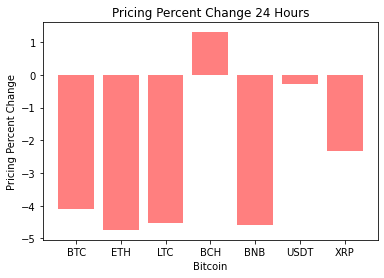

In [6]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 24hour'], color='r', alpha=0.5, align="center")
plt.title('Pricing Percent Change 24 Hours')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

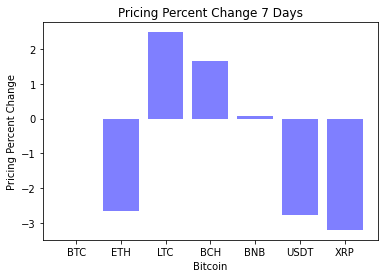

In [7]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 7day'], color='b', alpha=0.5, align="center")
plt.title('Pricing Percent Change 7 Days')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

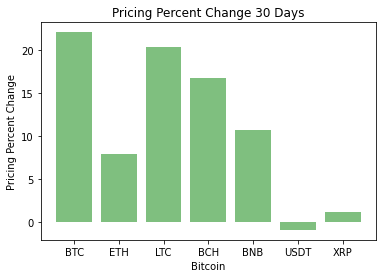

In [8]:
x_axis = lc_df['Symbol']

plt.bar(lc_df['Symbol'], lc_df['%Change 30day'], color='g', alpha=0.5, align="center")
plt.title('Pricing Percent Change 30 Days')
plt.xlabel('Bitcoin')
plt.ylabel('Pricing Percent Change')
plt.show()

In [9]:
social_df = pd.DataFrame(social_dict)
social_df

,Symbol,%Change 30day,Social Score,Correlation Rank,Galaxy Score
0,BTC,22.06,18687171,2.0,63.0
1,ETH,7.84,2547481,2.3,62.5
2,LTC,20.29,68720,1.8,59.5
3,BCH,16.68,200140,3.8,63.0
4,BNB,10.63,20722,1.7,56.5
5,USDT,-0.95,156198,3.6,65.5
6,XRP,1.08,751877,2.0,59.5


The correlation between both factors is -0.14


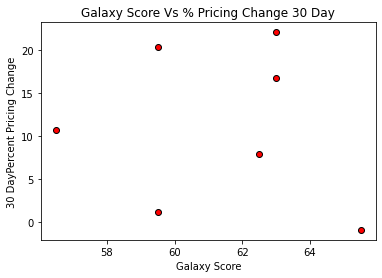

In [20]:
plt.scatter(social_df['Galaxy Score'], social_df['%Change 30day'],facecolors="red", edgecolors="black" )
correlation = st.pearsonr(social_df['Galaxy Score'], social_df['%Change 30day'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title('Galaxy Score Vs % Pricing Change 30 Day')
plt.xlabel('Galaxy Score')
plt.ylabel('30 DayPercent Pricing Change')
plt.show()

The correlation between both factors is -0.25


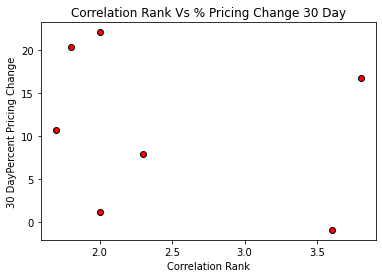

In [17]:
plt.scatter(social_df['Correlation Rank'], social_df['%Change 30day'],facecolors="red", edgecolors="black" )
correlation = st.pearsonr(social_df['Correlation Rank'], social_df['%Change 30day'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title('Correlation Rank Vs % Pricing Change 30 Day')
plt.xlabel('Correlation Rank')
plt.ylabel('30 DayPercent Pricing Change')
plt.show()

The correlation between both factors is 0.51


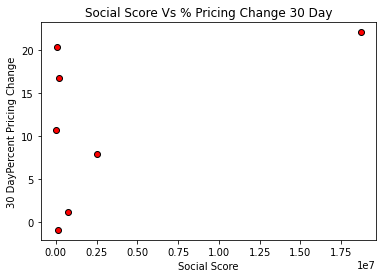

In [18]:
plt.scatter(social_df['Social Score'], social_df['%Change 30day'],facecolors="red", edgecolors="black" )
correlation = st.pearsonr(social_df['Social Score'], social_df['%Change 30day'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.title('Social Score Vs % Pricing Change 30 Day')
plt.xlabel('Social Score')
plt.ylabel('30 DayPercent Pricing Change')
plt.show()